In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pip install Markdown

Note: you may need to restart the kernel to use updated packages.


In [5]:
import markdown

In [16]:
path = "/home/peterdays/Documents/personal/retrieva/artifacts/sagemaker_documentation/sagemaker-projects-studio-updates.md"

In [14]:
with open(path, "r", encoding="utf-8") as input_file:
    text = input_file.read()
html = markdown.markdown(text)
md = markdown.Markdown(extensions = ['meta'])
html_converted = md.convert(text)
# Meta-data has been stripped from output
print(html_converted)
    
    
    # View meta-data
print(html)

<h1>SageMaker Studio Permissions Required to Use Projects<a name="sagemaker-projects-studio-updates"></a></h1>
<p>Users can view SageMaker provided project templates and create projects with those templates when you grant <strong>Projects</strong> permissions for users. You can grant these permissions when you onboard or update Amazon SageMaker Studio. There are two permissions to grant.</p>
<ol>
<li>
<p>Grant <strong>Projects</strong> permissions for the Studio administrator to permit the Studio administrator to view the SageMaker-provided templates in the Service Catalog console. The administrator can see what other Studio users create if you grant them permission to use SageMaker projects. The administrator can also view the AWS CloudFormation template that the SageMaker-provided project templates define in the Service Catalog console. For information about using the Service Catalog console, see <a href="https://docs.aws.amazon.com/servicecatalog/latest/adminguide/introduction.html"

In [15]:
md.Meta

{}

In [18]:

md = markdown.Markdown(extensions=['meta'])
md.convert(data)
print(md.Meta)

{}


In [19]:
pip install beautifulsoup4


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
from bs4 import BeautifulSoup
from markdown import markdown
import pathlib
text = pathlib.Path(path).read_text(encoding='utf-8')
html = markdown(text)

# import module
import requests
import pandas as pd
from bs4 import BeautifulSoup


soup = BeautifulSoup(html, 'html.parser') 
data = ''
for data in soup.find_all():
    print(data.name, "|", data.get_text())

h1 | SageMaker Studio Permissions Required to Use Projects
a | 
p | Users can view SageMaker provided project templates and create projects with those templates when you grant Projects permissions for users. You can grant these permissions when you onboard or update Amazon SageMaker Studio. There are two permissions to grant.
strong | Projects
ol | 

Grant Projects permissions for the Studio administrator to permit the Studio administrator to view the SageMaker-provided templates in the Service Catalog console. The administrator can see what other Studio users create if you grant them permission to use SageMaker projects. The administrator can also view the AWS CloudFormation template that the SageMaker-provided project templates define in the Service Catalog console. For information about using the Service Catalog console, see What Is Service Catalog in the Service Catalog User Guide.


Allow Studio users who are configured to use the same execution role as the domain to create projec

In [29]:
data.name

'code'

In [26]:
soup

<h1>SageMaker Studio Permissions Required to Use Projects<a name="sagemaker-projects-studio-updates"></a></h1>
<p>Users can view SageMaker provided project templates and create projects with those templates when you grant <strong>Projects</strong> permissions for users. You can grant these permissions when you onboard or update Amazon SageMaker Studio. There are two permissions to grant.</p>
<ol>
<li>
<p>Grant <strong>Projects</strong> permissions for the Studio administrator to permit the Studio administrator to view the SageMaker-provided templates in the Service Catalog console. The administrator can see what other Studio users create if you grant them permission to use SageMaker projects. The administrator can also view the AWS CloudFormation template that the SageMaker-provided project templates define in the Service Catalog console. For information about using the Service Catalog console, see <a href="https://docs.aws.amazon.com/servicecatalog/latest/adminguide/introduction.html"

In [20]:
pip install mistune

Note: you may need to restart the kernel to use updated packages.


In [22]:
import mistune
markdown = mistune.create_markdown(renderer=None)
# INSTALL IF USE!!
markdown(text)

[{'type': 'heading',
  'attrs': {'level': 1},
  'style': 'axt',
  'children': [{'type': 'text', 'raw': 'Use Amazon SageMaker Jobs'},
   {'type': 'inline_html', 'raw': '<a name="kubernetes-sagemaker-jobs">'},
   {'type': 'inline_html', 'raw': '</a>'}]},
 {'type': 'blank_line'},
 {'type': 'paragraph',
  'children': [{'type': 'text',
    'raw': 'This section is based on the original version of '},
   {'type': 'link',
    'children': [{'type': 'text',
      'raw': 'SageMaker Operators for Kubernetes'}],
    'attrs': {'url': 'https://github.com/aws/amazon-sagemaker-operator-for-k8s'}},
   {'type': 'text', 'raw': '.'}]},
 {'type': 'blank_line'},
 {'type': 'paragraph',
  'children': [{'type': 'strong',
    'children': [{'type': 'text', 'raw': 'Important'}]},
   {'type': 'linebreak'},
   {'type': 'text',
    'raw': 'We are stopping the development and technical support of '},
   {'type': 'link',
    'children': [{'type': 'text',
      'raw': 'SageMaker Operators for Kubernetes'}],
    'attrs':

## Data indexing

In [2]:
from retrieva import ROOT_PATH
from retrieva.data import get_file_paths
import os
import pathlib
import re

data_path = os.path.join(ROOT_PATH, "artifacts/sagemaker_documentation")
df = get_file_paths(data_path)

## Checking the char distribution of the documentation

In [3]:
for i, r in df.iterrows():
    text = pathlib.Path(r["filepath"]).read_text(encoding='utf-8')
    words_len = len(re.findall(r'\w+', text))
    chars_len = len(text)
    df.loc[i, ["words_len", "chars_len"]] = words_len, chars_len

array([[<AxesSubplot: title={'center': 'words_len'}>,
        <AxesSubplot: title={'center': 'chars_len'}>]], dtype=object)

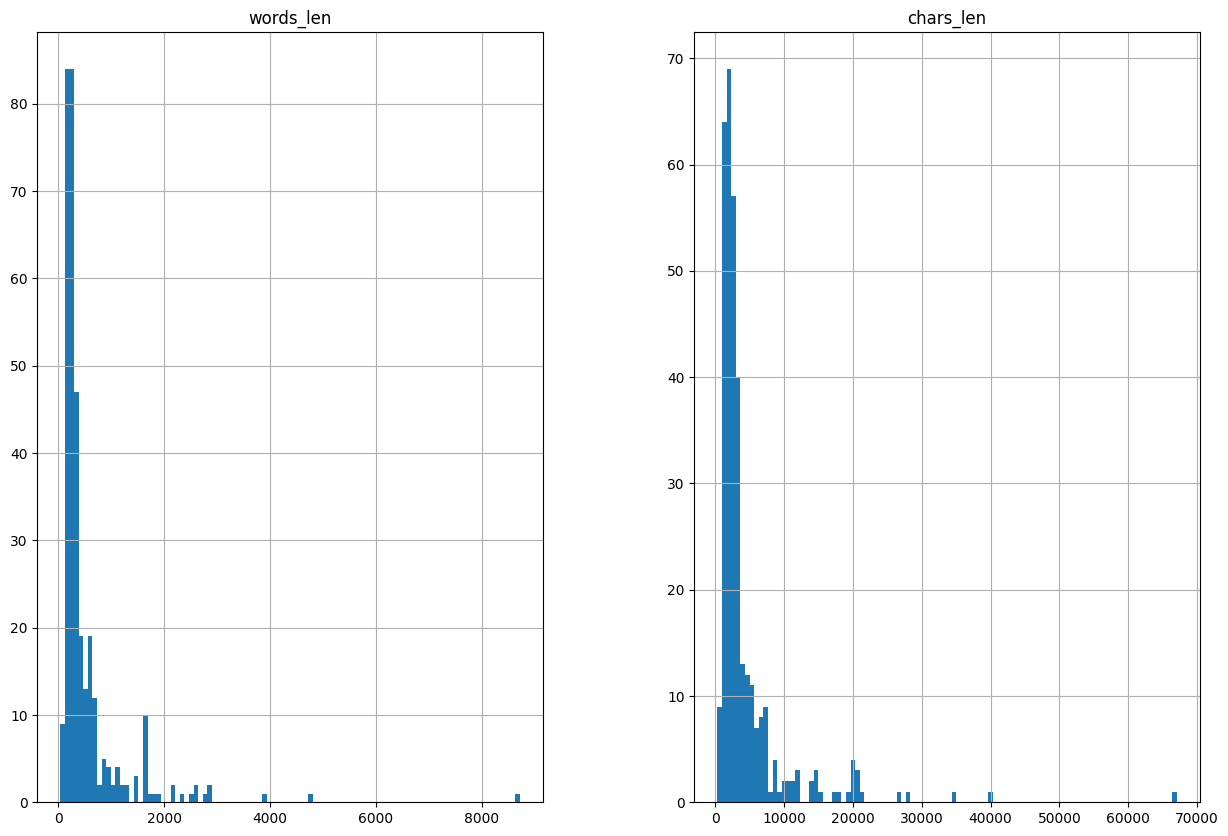

In [4]:
df[["words_len", "chars_len"]].hist(bins=100, figsize=(15, 10))

# First strategy: divide code from text

## dividing into code and text

In [10]:
r["filepath"]

'/home/peterdays/Documents/personal/retrieva/artifacts/sagemaker_documentation/aws-properties-sagemaker-modelbiasjobdefinition-networkconfig.md'

In [ ]:
def extract_text_code(filepath):
    text = pathlib.Path(r["filepath"]).read_text(encoding='utf-8')

    text_and_code = text.split('```')
    text = text_and_code[::2]
    code = text_and_code[1::2]

    return text, code

In [18]:
for i, r in df.iterrows():
    text = pathlib.Path(r["filepath"]).read_text(encoding='utf-8')

    text_and_code = text.split('```')
    text = text_and_code[::2]
    code = text_and_code[1::2]
    break

    # we can also do something with mistune
    df.iloc[i, ]

In [20]:
print("".join(code))


{
  "[EnableInterContainerTrafficEncryption](#cfn-sagemaker-modelbiasjobdefinition-networkconfig-enableintercontainertrafficencryption)" : Boolean,
  "[EnableNetworkIsolation](#cfn-sagemaker-modelbiasjobdefinition-networkconfig-enablenetworkisolation)" : Boolean,
  "[VpcConfig](#cfn-sagemaker-modelbiasjobdefinition-networkconfig-vpcconfig)" : VpcConfig
}

  [EnableInterContainerTrafficEncryption](#cfn-sagemaker-modelbiasjobdefinition-networkconfig-enableintercontainertrafficencryption): Boolean
  [EnableNetworkIsolation](#cfn-sagemaker-modelbiasjobdefinition-networkconfig-enablenetworkisolation): Boolean
  [VpcConfig](#cfn-sagemaker-modelbiasjobdefinition-networkconfig-vpcconfig): 
    VpcConfig



In [16]:
import mistune
markdown = mistune.create_markdown(renderer=None)
# INSTALL IF USE!!
markdown(text)

[{'type': 'heading',
  'attrs': {'level': 1},
  'style': 'axt',
  'children': [{'type': 'text',
    'raw': 'AWS::SageMaker::ModelBiasJobDefinition NetworkConfig'},
   {'type': 'inline_html',
    'raw': '<a name="aws-properties-sagemaker-modelbiasjobdefinition-networkconfig">'},
   {'type': 'inline_html', 'raw': '</a>'}]},
 {'type': 'blank_line'},
 {'type': 'paragraph',
  'children': [{'type': 'text',
    'raw': 'Networking options for a job, such as network traffic encryption between containers, whether to allow inbound and outbound network calls to and from containers, and the VPC subnets and security groups to use for VPC'},
   {'type': 'text', 'raw': '-'},
   {'type': 'text', 'raw': 'enabled jobs'},
   {'type': 'text', 'raw': '.'}]},
 {'type': 'blank_line'},
 {'type': 'heading',
  'attrs': {'level': 2},
  'style': 'axt',
  'children': [{'type': 'text', 'raw': 'Syntax'},
   {'type': 'inline_html',
    'raw': '<a name="aws-properties-sagemaker-modelbiasjobdefinition-networkconfig-synt

In [6]:
print(text)

['# AWS::SageMaker::ModelBiasJobDefinition NetworkConfig<a name="aws-properties-sagemaker-modelbiasjobdefinition-networkconfig"></a>\n\nNetworking options for a job, such as network traffic encryption between containers, whether to allow inbound and outbound network calls to and from containers, and the VPC subnets and security groups to use for VPC\\-enabled jobs\\.\n\n## Syntax<a name="aws-properties-sagemaker-modelbiasjobdefinition-networkconfig-syntax"></a>\n\nTo declare this entity in your AWS CloudFormation template, use the following syntax:\n\n### JSON<a name="aws-properties-sagemaker-modelbiasjobdefinition-networkconfig-syntax.json"></a>\n\n', '\n\n### YAML<a name="aws-properties-sagemaker-modelbiasjobdefinition-networkconfig-syntax.yaml"></a>\n\n', '\n\n## Properties<a name="aws-properties-sagemaker-modelbiasjobdefinition-networkconfig-properties"></a>\n\n`EnableInterContainerTrafficEncryption`  <a name="cfn-sagemaker-modelbiasjobdefinition-networkconfig-enableintercontainert

## Checking the char distribution of the documentation

In [4]:
for i, r in df.iterrows():
    text = pathlib.Path(r["filepath"]).read_text(encoding='utf-8')
    words_len = len(re.findall(r'\w+', text))
    chars_len = len(text)
    df.loc[i, ["words_len", "chars_len"]] = words_len, chars_len

array([[<AxesSubplot: title={'center': 'words_len'}>,
        <AxesSubplot: title={'center': 'chars_len'}>]], dtype=object)

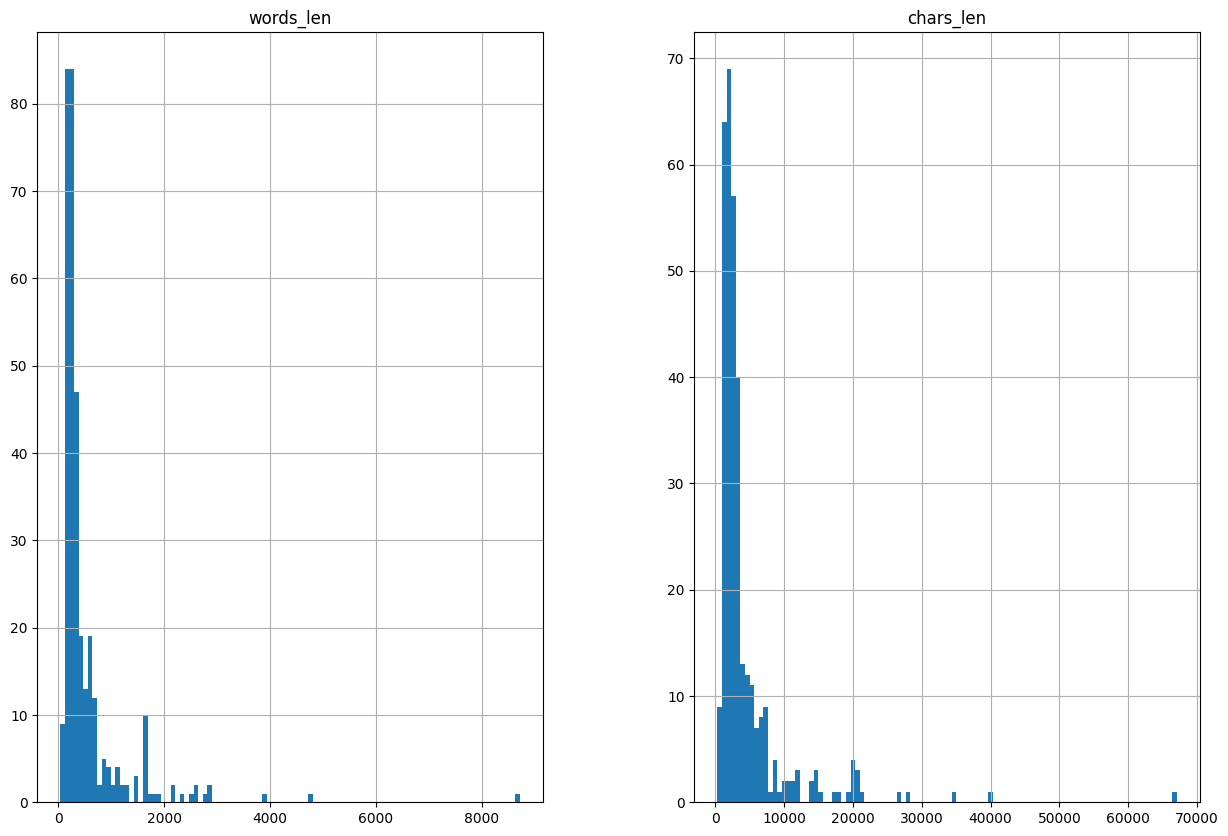

In [8]:
df[["words_len", "chars_len"]].hist(bins=100, figsize=(15, 10))

In [16]:
large_example = df[df.words_len > 6000].filepath.values[0]
text = pathlib.Path(large_example).read_text(encoding='utf-8')

In [17]:
large_example

'/home/peterdays/Documents/personal/retrieva/artifacts/sagemaker_documentation/kubernetes-sagemaker-jobs.md'